In [1]:
import pandas as pd
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE

In [2]:
df_entrenamiento = pd.read_csv('C:/Users/tomas/OneDrive - Universidad de Chile/Semestre 2023-2 Archivos/Laboratorio de Programación Científica/Laboratorios/Github/casoCDD/Cruce/data_para_entrenar.csv')

In [3]:
df_entrenamiento

,Unnamed: 0,username,grade,seq_4_avg,quiz_avg,seq_0_avg,seq_1_avg,seq_2_avg,seq_3_avg,duracion_sesion_avg,...,num_eventos_seq_2,num_eventos_seq_3,num_eventos_seq_4,label,avg_day_diff,std_dev_day_diff,nightactivity_2_to_5,nightactivity_0_to_2,sesionesde_2_5,sesionesde_0_2
0,0,2fb73a5b451fa1beba6a7e6c86cf66ab3d8bfa3fc256bb...,1.00,1.0,0.965517,1.000,1.000000,1.000000,1.000000,4.944454,...,128.0,16.0,20.0,1,31.400000,23.027520,101,311,4,4
1,1,c5f32ddce577c3f4cce3bcdcb5c8e0e03933b5cc62fa18...,0.99,1.0,0.956897,1.000,0.977273,1.000000,1.000000,2.410485,...,90.0,16.0,6.0,1,31.071429,19.920860,66,135,1,9
2,2,81528304670b5be911641ecc2ba3a21195234d10c3ab43...,1.00,1.0,0.965517,1.000,1.000000,1.000000,1.000000,3.794893,...,151.0,47.0,8.0,1,24.523810,18.843086,297,221,4,8
3,3,61d11a14e95e598a883d48aea410c474ca6f419ee8a5b0...,0.88,1.0,0.850690,0.625,0.909091,0.907778,1.000000,4.008391,...,201.0,33.0,9.0,1,24.266667,19.229689,657,23,14,1
4,4,d2a219fcbb9b9c215e223d0d9cb87d1fe21cbdc9d3a403...,1.00,1.0,0.965517,1.000,1.000000,1.000000,1.000000,9.352263,...,80.0,19.0,11.0,0,26.222222,18.962984,365,514,8,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,380,3b9e7dea2317f256ee1d53c315188f34b11230277816cb...,0.69,1.0,0.663793,0.000,0.431818,0.500000,0.333333,3.049245,...,68.0,13.0,3.0,1,21.307692,16.178095,183,0,0,0
381,381,719e4b4fb309a1e09aa804e5e6e24a69440e7fe9ea722e...,0.67,1.0,0.603448,0.500,0.181818,0.277778,0.333333,1.954453,...,68.0,1.0,0.0,0,16.181818,15.955050,102,142,1,6
382,382,92a129f1bde9bb8ce40e53b16bd35ac9e310d1521f710a...,0.67,1.0,0.643793,0.500,0.454545,0.630000,0.000000,4.753358,...,179.0,74.0,1.0,0,23.700000,15.114746,250,205,4,6
383,383,aaaf669774ef0c97d31b015d5f49dabf34b7fc43f1c57e...,0.63,1.0,0.603448,0.375,0.500000,0.500000,0.000000,4.902449,...,270.0,3.0,0.0,1,18.555556,14.892205,86,359,1,1


In [4]:
df_entrenamiento.columns

Index(['Unnamed: 0', 'username', 'grade', 'seq_4_avg', 'quiz_avg', 'seq_0_avg',
       'seq_1_avg', 'seq_2_avg', 'seq_3_avg', 'duracion_sesion_avg',
       'duracion_sesion_std', 'duracion_EOL', 'num_sesiones_agosto',
       'num_sesiones_septiembre', 'num_sesiones_noviembre', 'page_close_mean',
       'page_close_std', 'problem_graded_mean', 'problem_graded_std',
       'problem_check_mean', 'problem_check_std', 'problem_show_mean',
       'problem_show_std', 'load_video_mean', 'load_video_std',
       'play_video_mean', 'play_video_std', 'pause_video_mean',
       'pause_video_std', 'speed_change_video_mean', 'speed_change_video_std',
       'num_eventos_seq_0', 'num_eventos_seq_1', 'num_eventos_seq_2',
       'num_eventos_seq_3', 'num_eventos_seq_4', 'label', 'avg_day_diff',
       'std_dev_day_diff', 'nightactivity_2_to_5', 'nightactivity_0_to_2',
       'sesionesde_2_5', 'sesionesde_0_2'],
      dtype='object')

In [5]:
df_entrenamiento.drop(['Unnamed: 0', 'username'], axis = 1, inplace=True)


In [6]:
df_entrenamiento

,grade,seq_4_avg,quiz_avg,seq_0_avg,seq_1_avg,seq_2_avg,seq_3_avg,duracion_sesion_avg,duracion_sesion_std,duracion_EOL,...,num_eventos_seq_2,num_eventos_seq_3,num_eventos_seq_4,label,avg_day_diff,std_dev_day_diff,nightactivity_2_to_5,nightactivity_0_to_2,sesionesde_2_5,sesionesde_0_2
0,1.00,1.0,0.965517,1.000,1.000000,1.000000,1.000000,4.944454,5.131721,64.0,...,128.0,16.0,20.0,1,31.400000,23.027520,101,311,4,4
1,0.99,1.0,0.956897,1.000,0.977273,1.000000,1.000000,2.410485,2.627586,60.0,...,90.0,16.0,6.0,1,31.071429,19.920860,66,135,1,9
2,1.00,1.0,0.965517,1.000,1.000000,1.000000,1.000000,3.794893,5.967056,59.0,...,151.0,47.0,8.0,1,24.523810,18.843086,297,221,4,8
3,0.88,1.0,0.850690,0.625,0.909091,0.907778,1.000000,4.008391,5.076566,58.0,...,201.0,33.0,9.0,1,24.266667,19.229689,657,23,14,1
4,1.00,1.0,0.965517,1.000,1.000000,1.000000,1.000000,9.352263,8.270573,58.0,...,80.0,19.0,11.0,0,26.222222,18.962984,365,514,8,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,0.69,1.0,0.663793,0.000,0.431818,0.500000,0.333333,3.049245,5.464765,43.0,...,68.0,13.0,3.0,1,21.307692,16.178095,183,0,0,0
381,0.67,1.0,0.603448,0.500,0.181818,0.277778,0.333333,1.954453,2.438375,47.0,...,68.0,1.0,0.0,0,16.181818,15.955050,102,142,1,6
382,0.67,1.0,0.643793,0.500,0.454545,0.630000,0.000000,4.753358,7.902606,41.0,...,179.0,74.0,1.0,0,23.700000,15.114746,250,205,4,6
383,0.63,1.0,0.603448,0.375,0.500000,0.500000,0.000000,4.902449,6.121627,37.0,...,270.0,3.0,0.0,1,18.555556,14.892205,86,359,1,1


In [7]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import random
seed = 314159
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)


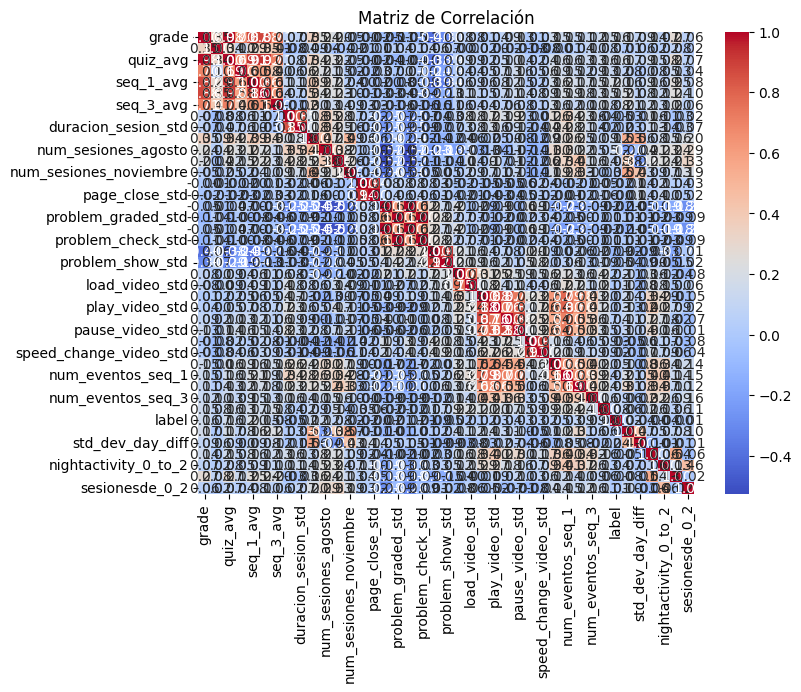

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Calcular la matriz de correlación
correlation_matrix = df_entrenamiento.corr()

# Visualizar la matriz de correlación utilizando seaborn y matplotlib
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

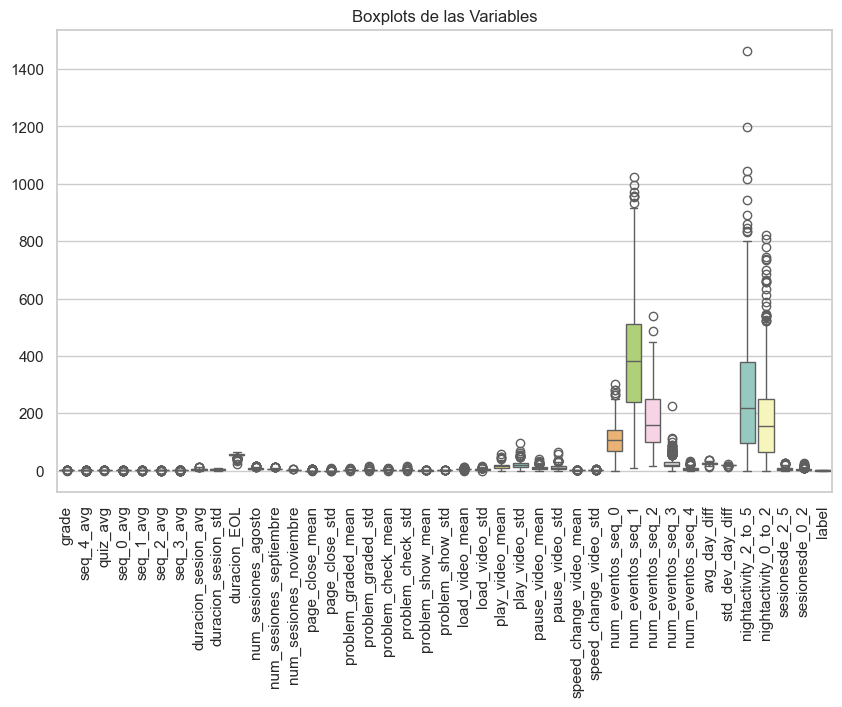

In [12]:
# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear boxplots para cada variable
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_entrenamiento, palette="Set3")
plt.xticks(rotation=90)  
plt.title('Boxplots de las Variables')
plt.show()

In [8]:
X = df_entrenamiento.drop(columns=['label'])  # Características
y = df_entrenamiento['label']  # Etiquetas



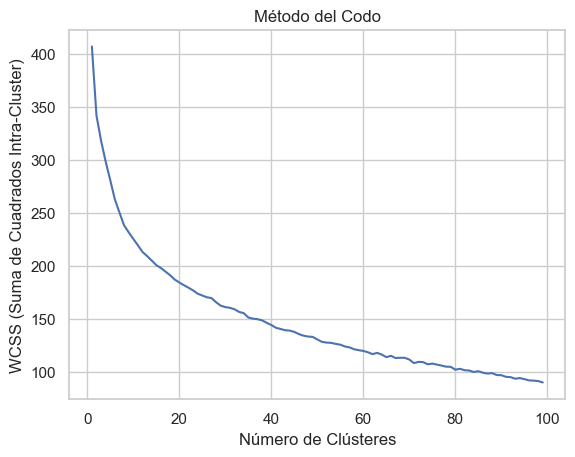

In [12]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Supongamos que 'df' es tu DataFrame original con las características numéricas que deseas clusterizar
# Selecciona solo las columnas numéricas
numeric_columns = X.select_dtypes(include=['float64', 'int64'])

# Escala las características para asegurar que todas estén en la misma escala
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(numeric_columns)

# Determina el número óptimo de clústeres utilizando, por ejemplo, el método del codo
# Aquí uso el algoritmo KMeans como ejemplo
wcss = []
for i in range(1, 100):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Grafica el método del codo para ayudar a determinar el número óptimo de clústeres
import matplotlib.pyplot as plt
plt.plot(range(1, 100), wcss)
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres')
plt.ylabel('WCSS (Suma de Cuadrados Intra-Cluster)')
plt.show()



In [13]:
# Basándote en el gráfico del método del codo, elige el número óptimo de clústeres
optimal_clusters = 20  # ¡Ajusta esto según tu análisis del gráfico!

# Realiza la clusterización con el número óptimo de clústeres
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
X['cluster_label'] = kmeans.fit_predict(scaled_data)

# Ahora, 'cluster_label' contiene las etiquetas de clúster para cada fila en tu DataFrame
X

,grade,seq_4_avg,quiz_avg,seq_0_avg,seq_1_avg,seq_2_avg,seq_3_avg,duracion_sesion_avg,duracion_sesion_std,duracion_EOL,...,pause_video_mean,pause_video_std,speed_change_video_mean,speed_change_video_std,num_eventos_seq_0,num_eventos_seq_1,num_eventos_seq_2,num_eventos_seq_3,num_eventos_seq_4,cluster_label
0,1.000000,1.0,0.965517,1.000000,1.000000,1.000000,1.00000,4.944454,5.131721,64.000000,...,8.700000,7.409453,0.300000,0.674949,76.000000,384.000000,128.000000,16.000000,20.000000,10
1,0.990000,1.0,0.956897,1.000000,0.977273,1.000000,1.00000,2.410485,2.627586,60.000000,...,4.428571,5.957727,0.142857,0.363137,70.000000,168.000000,90.000000,16.000000,6.000000,2
2,1.000000,1.0,0.965517,1.000000,1.000000,1.000000,1.00000,3.794893,5.967056,59.000000,...,7.571429,10.399863,0.142857,0.478091,197.000000,346.000000,151.000000,47.000000,8.000000,6
3,0.880000,1.0,0.850690,0.625000,0.909091,0.907778,1.00000,4.008391,5.076566,58.000000,...,13.600000,22.487457,0.600000,1.298351,177.000000,466.000000,201.000000,33.000000,9.000000,4
4,1.000000,1.0,0.965517,1.000000,1.000000,1.000000,1.00000,9.352263,8.270573,58.000000,...,15.333333,25.263319,0.777778,1.060275,264.000000,810.000000,80.000000,19.000000,11.000000,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,0.940363,1.0,0.868407,1.000000,0.804222,0.779122,1.00000,5.003087,7.729962,52.000000,...,6.908206,10.864660,0.122678,0.272942,67.602155,244.612931,156.119639,8.036288,3.012096,5
604,0.842813,1.0,0.813376,0.866209,0.762787,0.704212,0.69011,5.248995,6.035853,56.394506,...,9.150560,9.437040,0.200196,0.477776,134.394506,451.265933,186.107700,13.000000,2.929670,5
605,0.839504,1.0,0.809557,0.947313,0.703419,0.532586,1.00000,6.482947,6.920673,53.842985,...,5.525875,7.274908,0.106805,0.295753,94.586866,419.706268,135.533134,22.314030,11.318209,18
606,0.881915,1.0,0.852923,0.717063,0.817364,0.902334,1.00000,5.551731,6.395383,55.263499,...,15.414130,18.579293,1.461072,2.026446,127.521237,556.190787,222.634988,29.964003,10.982002,19


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=314159, stratify=y)


In [10]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Selecciona las columnas que deben ser escaladas
cols_to_scale = X_train.select_dtypes(include=['float64', 'int64', 'int32']).columns

# Ajusta el scaler con los datos de entrenamiento solo para aquellas columnas que no están en el rango [0, 1]
scaler = MinMaxScaler()
for col in cols_to_scale:
    if X_train[col].min() < 0 or X_train[col].max() > 1:
        X_train[col] = scaler.fit_transform(X_train[[col]])
        # Transforma también los datos de prueba usando el mismo scaler
        X_test[col] = scaler.transform(X_test[[col]])


In [11]:
import optuna
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def objective(trial):
    # Definir espacio de búsqueda de hiperparámetros
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-1)
    num_hidden_layers = trial.suggest_int("num_hidden_layers", 1, 8)
    num_hidden_units = trial.suggest_int("num_hidden_units", 16, 256)
    dropout_rate = trial.suggest_float("dropout_rate", 0.0, 0.5)
    optimizer = trial.suggest_categorical("optimizer", ["adam", "sgd", "rmsprop"])
    activation = trial.suggest_categorical("activation", ["relu", "tanh", "sigmoid", "elu"])
    batch_size = trial.suggest_categorical("batch_size", [608//8, 608//16, 608//32, 608//64])
    smote_type = trial.suggest_categorical("smote_type", ["SMOTE", "BorderlineSMOTE", "SVMSMOTE"])
    
    # Seleccionar el tipo de SMOTE según la sugerencia de Optuna
    if smote_type == "SMOTE":
        smote = SMOTE(sampling_strategy='auto', random_state=42)
    elif smote_type == "BorderlineSMOTE":
        smote = BorderlineSMOTE(sampling_strategy='auto', random_state=42)
    elif smote_type == "SVMSMOTE":
        smote = SVMSMOTE(sampling_strategy='auto', random_state=42)
    else:
        raise ValueError("Tipo de SMOTE no soportado")

    # Aplicar SMOTE al conjunto de entrenamiento actual
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
    
    # Construir el modelo de red neuronal con los hiperparámetros
    model = keras.Sequential()
    for _ in range(num_hidden_layers):
        model.add(keras.layers.Dense(num_hidden_units, activation=activation))
        model.add(keras.layers.BatchNormalization())
        model.add(keras.layers.Dropout(dropout_rate))
        
    model.add(keras.layers.Dense(1, activation="sigmoid"))

    # Compilar y entrenar el modelo
    if optimizer == "adam":
        optimizer_obj = keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == "sgd":
        optimizer_obj = keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer == "rmsprop":
        optimizer_obj = keras.optimizers.RMSprop(learning_rate=learning_rate)
    else:
        raise ValueError("Optimizador no soportado")

    model.compile(optimizer=optimizer_obj,
                  loss="binary_crossentropy",
                  metrics=["accuracy"])
    
    early_stopping = keras.callbacks.EarlyStopping(
        patience=30,
        min_delta=0.001,
        restore_best_weights=True,
    )
    
    model.fit(X_resampled, y_resampled, epochs=500, batch_size=batch_size, verbose=0, validation_data=(X_test, y_test), callbacks=[early_stopping])

    # Evaluar el modelo
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    accuracy = accuracy_score(y_test, y_pred)

    # Almacenar los pesos del modelo como un atributo del ensayo de Optuna
    trial.set_user_attr("model_weights", model.get_weights())
    
    # Guardar el modelo en los atributos de usuario del mejor intento
    trial.set_user_attr('model', model)

    return accuracy

# Crear un estudio Optuna

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

# Obtener el mejor conjunto de hiperparámetros
best_params = study.best_params
print("Mejor conjunto de hiperparámetros:", best_params)

# Después de la optimización, antes de guardar el objeto Study
best_model = study.best_trial.user_attrs.get('model')


c:\Users\tomas\anaconda3\envs\Lab_6\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2023-11-25 19:09:24,095] A new study created in memory with name: no-name-3a942946-2816-44c0-bbb9-6901beec1fad


3/3 [==============================] - 0s 3ms/step


[I 2023-11-25 19:09:32,136] Trial 0 finished with value: 0.7142857142857143 and parameters: {'learning_rate': 0.08051307659207152, 'num_hidden_layers': 4, 'num_hidden_units': 147, 'dropout_rate': 0.3482512274513458, 'optimizer': 'adam', 'activation': 'relu', 'batch_size': 76, 'smote_type': 'SVMSMOTE'}. Best is trial 0 with value: 0.7142857142857143.


3/3 [==============================] - 0s 4ms/step


[I 2023-11-25 19:09:37,055] Trial 1 finished with value: 0.7922077922077922 and parameters: {'learning_rate': 0.0025552545250265117, 'num_hidden_layers': 3, 'num_hidden_units': 185, 'dropout_rate': 0.44111365401587815, 'optimizer': 'adam', 'activation': 'tanh', 'batch_size': 76, 'smote_type': 'SMOTE'}. Best is trial 1 with value: 0.7922077922077922.


3/3 [==============================] - 0s 2ms/step


[I 2023-11-25 19:09:43,030] Trial 2 finished with value: 0.7922077922077922 and parameters: {'learning_rate': 0.07414465394493422, 'num_hidden_layers': 6, 'num_hidden_units': 101, 'dropout_rate': 0.32495412554500913, 'optimizer': 'rmsprop', 'activation': 'sigmoid', 'batch_size': 38, 'smote_type': 'SMOTE'}. Best is trial 1 with value: 0.7922077922077922.


3/3 [==============================] - 0s 2ms/step


[I 2023-11-25 19:09:49,338] Trial 3 finished with value: 0.7532467532467533 and parameters: {'learning_rate': 0.026684235205556718, 'num_hidden_layers': 2, 'num_hidden_units': 93, 'dropout_rate': 0.14248082075755214, 'optimizer': 'sgd', 'activation': 'relu', 'batch_size': 9, 'smote_type': 'BorderlineSMOTE'}. Best is trial 1 with value: 0.7922077922077922.


3/3 [==============================] - 0s 2ms/step


[I 2023-11-25 19:09:54,024] Trial 4 finished with value: 0.7922077922077922 and parameters: {'learning_rate': 0.08931698894820093, 'num_hidden_layers': 5, 'num_hidden_units': 125, 'dropout_rate': 0.17756579547159418, 'optimizer': 'rmsprop', 'activation': 'tanh', 'batch_size': 76, 'smote_type': 'SMOTE'}. Best is trial 1 with value: 0.7922077922077922.


3/3 [==============================] - 0s 2ms/step


[I 2023-11-25 19:09:56,760] Trial 5 finished with value: 0.7922077922077922 and parameters: {'learning_rate': 0.004148780558289522, 'num_hidden_layers': 1, 'num_hidden_units': 152, 'dropout_rate': 0.1687703631891201, 'optimizer': 'rmsprop', 'activation': 'tanh', 'batch_size': 76, 'smote_type': 'BorderlineSMOTE'}. Best is trial 1 with value: 0.7922077922077922.


3/3 [==============================] - 0s 3ms/step


[I 2023-11-25 19:10:05,818] Trial 6 finished with value: 0.7662337662337663 and parameters: {'learning_rate': 0.01970626731545932, 'num_hidden_layers': 7, 'num_hidden_units': 248, 'dropout_rate': 0.32214895957535095, 'optimizer': 'adam', 'activation': 'elu', 'batch_size': 38, 'smote_type': 'SMOTE'}. Best is trial 1 with value: 0.7922077922077922.


3/3 [==============================] - 0s 3ms/step


[I 2023-11-25 19:10:15,740] Trial 7 finished with value: 0.7922077922077922 and parameters: {'learning_rate': 0.027034961701620355, 'num_hidden_layers': 3, 'num_hidden_units': 41, 'dropout_rate': 0.4745715320136842, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 19, 'smote_type': 'SVMSMOTE'}. Best is trial 1 with value: 0.7922077922077922.


3/3 [==============================] - 0s 3ms/step


[I 2023-11-25 19:10:26,089] Trial 8 finished with value: 0.7922077922077922 and parameters: {'learning_rate': 0.030690407006842075, 'num_hidden_layers': 8, 'num_hidden_units': 32, 'dropout_rate': 0.23468184985776058, 'optimizer': 'rmsprop', 'activation': 'tanh', 'batch_size': 9, 'smote_type': 'BorderlineSMOTE'}. Best is trial 1 with value: 0.7922077922077922.


3/3 [==============================] - 0s 3ms/step


[I 2023-11-25 19:10:30,511] Trial 9 finished with value: 0.7922077922077922 and parameters: {'learning_rate': 0.05120240620058538, 'num_hidden_layers': 3, 'num_hidden_units': 189, 'dropout_rate': 0.48319489251407055, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 38, 'smote_type': 'BorderlineSMOTE'}. Best is trial 1 with value: 0.7922077922077922.


3/3 [==============================] - 0s 2ms/step


[I 2023-11-25 19:10:34,804] Trial 10 finished with value: 0.7922077922077922 and parameters: {'learning_rate': 0.05072650742139565, 'num_hidden_layers': 1, 'num_hidden_units': 230, 'dropout_rate': 0.04225484479472741, 'optimizer': 'adam', 'activation': 'elu', 'batch_size': 19, 'smote_type': 'SMOTE'}. Best is trial 1 with value: 0.7922077922077922.


3/3 [==============================] - 0s 2ms/step


[I 2023-11-25 19:10:44,505] Trial 11 finished with value: 0.7922077922077922 and parameters: {'learning_rate': 0.07149058429316978, 'num_hidden_layers': 6, 'num_hidden_units': 88, 'dropout_rate': 0.36062520325069836, 'optimizer': 'adam', 'activation': 'sigmoid', 'batch_size': 38, 'smote_type': 'SMOTE'}. Best is trial 1 with value: 0.7922077922077922.


3/3 [==============================] - 0s 3ms/step


[I 2023-11-25 19:10:53,912] Trial 12 finished with value: 0.5454545454545454 and parameters: {'learning_rate': 0.0001924051192390419, 'num_hidden_layers': 5, 'num_hidden_units': 196, 'dropout_rate': 0.40775786777174483, 'optimizer': 'rmsprop', 'activation': 'sigmoid', 'batch_size': 38, 'smote_type': 'SMOTE'}. Best is trial 1 with value: 0.7922077922077922.


3/3 [==============================] - 0s 2ms/step


[I 2023-11-25 19:11:02,635] Trial 13 finished with value: 0.7922077922077922 and parameters: {'learning_rate': 0.09891566261749604, 'num_hidden_layers': 6, 'num_hidden_units': 88, 'dropout_rate': 0.28615394759448465, 'optimizer': 'rmsprop', 'activation': 'sigmoid', 'batch_size': 76, 'smote_type': 'SMOTE'}. Best is trial 1 with value: 0.7922077922077922.


3/3 [==============================] - 0s 4ms/step


[I 2023-11-25 19:11:09,504] Trial 14 finished with value: 0.7922077922077922 and parameters: {'learning_rate': 0.06434560715388196, 'num_hidden_layers': 4, 'num_hidden_units': 200, 'dropout_rate': 0.4419529828838968, 'optimizer': 'adam', 'activation': 'sigmoid', 'batch_size': 76, 'smote_type': 'SMOTE'}. Best is trial 1 with value: 0.7922077922077922.


3/3 [==============================] - 0s 3ms/step


[I 2023-11-25 19:11:23,178] Trial 15 finished with value: 0.7922077922077922 and parameters: {'learning_rate': 0.06219048756820396, 'num_hidden_layers': 8, 'num_hidden_units': 121, 'dropout_rate': 0.3959993874643039, 'optimizer': 'adam', 'activation': 'sigmoid', 'batch_size': 38, 'smote_type': 'SMOTE'}. Best is trial 1 with value: 0.7922077922077922.


3/3 [==============================] - 0s 3ms/step


[I 2023-11-25 19:11:34,301] Trial 16 finished with value: 0.8181818181818182 and parameters: {'learning_rate': 0.04029941018156798, 'num_hidden_layers': 3, 'num_hidden_units': 165, 'dropout_rate': 0.4151298547305564, 'optimizer': 'rmsprop', 'activation': 'relu', 'batch_size': 9, 'smote_type': 'SVMSMOTE'}. Best is trial 16 with value: 0.8181818181818182.


3/3 [==============================] - 0s 2ms/step


[I 2023-11-25 19:11:43,418] Trial 17 finished with value: 0.8181818181818182 and parameters: {'learning_rate': 0.03838345609422923, 'num_hidden_layers': 3, 'num_hidden_units': 171, 'dropout_rate': 0.40374313572426673, 'optimizer': 'adam', 'activation': 'relu', 'batch_size': 9, 'smote_type': 'SVMSMOTE'}. Best is trial 16 with value: 0.8181818181818182.


3/3 [==============================] - 0s 1ms/step


[I 2023-11-25 19:11:50,904] Trial 18 finished with value: 0.8181818181818182 and parameters: {'learning_rate': 0.040398938989153275, 'num_hidden_layers': 2, 'num_hidden_units': 157, 'dropout_rate': 0.3907386830992815, 'optimizer': 'rmsprop', 'activation': 'relu', 'batch_size': 9, 'smote_type': 'SVMSMOTE'}. Best is trial 16 with value: 0.8181818181818182.


: 

In [16]:
from sklearn.metrics import classification_report
# Hacer predicciones con el mejor modelo en el conjunto de prueba
y_pred = (best_model.predict(X_test) > 0.5).astype(int)

# Generar un informe de clasificación
report = classification_report(y_test, y_pred)
print("Informe de clasificación:\n", report)

7/7 [==============================] - 0s 2ms/step
Informe de clasificación:
               precision    recall  f1-score   support

           0       0.77      0.83      0.80       101
           1       0.82      0.75      0.79       102

    accuracy                           0.79       203
   macro avg       0.79      0.79      0.79       203
weighted avg       0.80      0.79      0.79       203



In [34]:
df_val = pd.read_csv('C:/Users/tomas/OneDrive - Universidad de Chile/Semestre 2023-2 Archivos/Laboratorio de Programación Científica/Laboratorios/Github/casoCDD/Cruce/data_para_validar.csv')

In [35]:
X_new = df_val.drop(['username', 'Unnamed: 0'], axis=1)

In [36]:
# Ajusta el scaler a tus datos de entrenamiento y luego transforma los datos
X_val = scaler.fit_transform(X_new)

In [37]:
# Realizar predicciones con el modelo cargado
y_pred = (best_model.predict(X_val) > 0.5).astype(int)

# Agregar las predicciones como una nueva columna al conjunto de datos original
resultados = pd.DataFrame({'username': df_val['username'], 'Prediccion': y_pred.flatten()})

# Guardar los resultados en un archivo CSV
resultados.to_csv('resultados_predichos.csv', index=False)

5/5 [==============================] - 0s 2ms/step
